# K-means
## 개요
Clustering 이란 비슷한 특성을 가진 데이터들끼리 묶어주는 머신러닝 기법이며, K-means, DBSCAN, Hierarchical clustering, Spectral Clustering 등 여러가지 알고리즘이 있다. 그 중 K-means 는 K개의 중심점을 정해서 각 중심점과 데이터 사이의 거리의 합이 최소가 되게끔 하는 기법이다. 매우 직관적인 방법이기 때문에 널리 쓰인다.

KNN 과 다르게 K-means 는 오직 Euclidean Distance 를 이용한다. 임의의 거리 함수를 쓸 경우 중심점이 수렴하지 않을 수 있기 때문이다. 자세한 설명은 [여기](https://stats.stackexchange.com/questions/81481/why-does-k-means-clustering-algorithm-use-only-euclidean-distance-metric)에 있다.

## 방법
1. 먼저 데이터 셋에서 랜덤한 K개의 데이터를 뽑아 이를 중심점 $C_1, ..., C_k$로 정한다.

2. 각 $X_i$ 에 대해 가장 가까운 중심점을 찾는다. 만약 $C_j$가 가장 가깝다면 $X_i$ 를 그룹 $j$로 분류한다.

3. 각 그룹에 대한 데이터의 평균을 낸 것을 새로운 중심점으로 삼는다.

4. 위 과정을 반복한다. 이 때, 탈출 조건은 두가지 방법으로 정할 수 있다. 반복 횟수를 정하거나, 이전 시행에서의 중심점들과 업데이트 된 중심점들이 충분히 가까우면 수렴했다고 판단하여 알고리즘을 종료하는 방법 두가지가 있다. 또 한 두 방법을 합쳐서, 반복 횟수의 상한을 정하되, 중심점들이 충분히 수렴하면 조기 종료하는 방법을 택할 수 있다.

## 한계
K-means 알고리즘은 직관적이며 간단하지만, 각 군집이 다른 밀도나, 다른 크기를 갖고 있는 경우 군집을 잘 찾아내지 못한다. 또, 군집의 형태가 원이 아닌 매우 특이한 패턴이 있을 경우에도 성능이 떨어진다. 이를 보완하기 위해 DBSCAN 과 같은 알고리즘이 존재한다.

# 실습
무작위 데이터를 만들어 구현한 K-means 알고리즘이 잘 작동하는지 확인 해 보자.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
k = 3
real_centers = np.random.randint(-5, 5, (k, 2))

real_centers

array([[-3,  4],
       [-1,  4],
       [ 2,  1]])

In [ ]:
x = []
for c in real_centers:
    x.extend(np.random.normal(loc=c, scale=0.5, size=(100, 2)))
x = np.array(x)
x.shape

(300, 2)

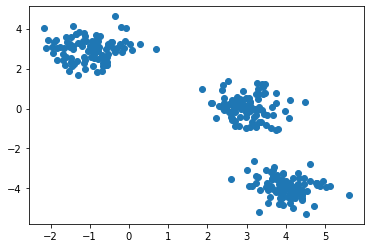

In [ ]:
plt.scatter(x=x[:, 0], y=x[:, 1])
plt.show()

In [ ]:
def dist(x, y):
    return np.sqrt(np.sum((x - y) ** 2, axis=1)) / len(x)

def find_closest_center(row, centers):
    d = dist(row, centers)
    return np.argmin(d)
    

def kmeans(x, k, itr_num=100, eps=0.01):
    centers = x[np.random.choice(x.shape[0], size=k, replace=False)]
    for itr in range(itr_num):
        group = np.zeros(x.shape[0])
        new_centers = np.zeros_like(centers)
        
        for i, row in enumerate(x):
            group[i] = find_closest_center(row, centers)
        for i in range(k):
            new_centers[i] = x[np.where(group == i)].mean(axis=0)
        
        if np.sum(dist(centers, new_centers)) / k < eps:
            return group, new_centers
        centers = new_centers
    return group, centers

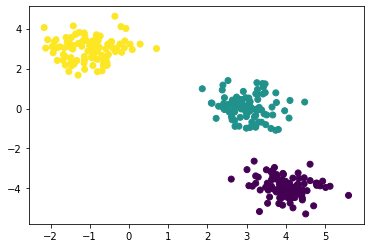

In [ ]:
group, centers = kmeans(x, k)

plt.scatter(x[:, 0], x[:, 1], c=group)
plt.show()

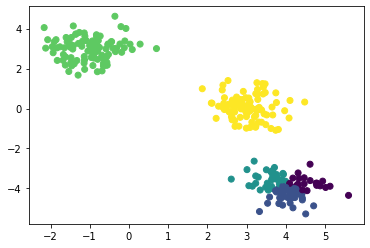

In [ ]:
group, centers = kmeans(x, k + 2)

plt.scatter(x[:, 0], x[:, 1], c=group)
plt.show()

# sklearn 이용

In [ ]:
from sklearn.cluster import KMeans

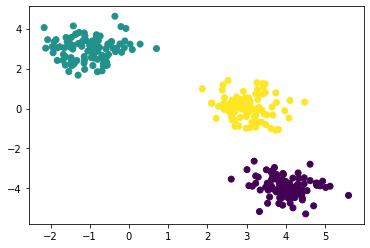

In [ ]:
kmeans = KMeans(n_clusters=k, random_state=0).fit(x)

plt.scatter(x[:, 0], x[:, 1], c=kmeans.labels_)
plt.show()

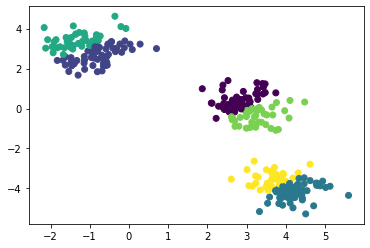

In [ ]:
kmeans = KMeans(n_clusters=k + 3, random_state=0).fit(x)

plt.scatter(x[:, 0], x[:, 1], c=kmeans.labels_)
plt.show()